<a href="https://colab.research.google.com/github/ChrisPerez13/CompPhys/blob/main/Christopher_Perez_Lab05_Part1__Simple_Harmonic_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 1: Collect Data and Plot Solution

* In the first part of this week's lab, we will collect data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        |    |  |  |
| $\omega$ |    |  |  |
| $\phi$   |    |  |  |

## 0. Import modules

In the cell below, import numpy and matplotlib

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt


## 1. Collecting Your Data

* Obtain some position vs. time data for a simple harmonic oscillator (mass on spring).

### Procedure

(3 pts)

* Briefly describe the procedure you used to set up your system and collect your data.  
* Take a picture of your experimental setup and upload it here.


**Your Answer Here**




## 2. Upload Data Into Colab

(2 points)

* In the bottom left of your window, click on the `<>` icon to access `Code snippets`.

* Select `Open files from your local file system`, then `Insert`.

* Select your data files to upload, and upload them.



In [ ]:
# upload your data
import pandas as pd
from astropy.table import Table



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving csv-export (4).csv to csv-export (4) (2).csv
User uploaded file "csv-export (4) (2).csv" with length 10 bytes


In [ ]:
# use astropy to read in your data file
data = Table.read("csv-export (4).csv",format='csv')
data

Data Set 1:Time(s),Data Set 1:Position(m),Data Set 1:Velocity(m/s),Data Set 1:Acceleration(m/s²),Data Set 2:Time(s),Data Set 2:Position(m),Data Set 2:Velocity(m/s),Data Set 2:Acceleration(m/s²),Data Set 3:Time(s),Data Set 3:Position(m),Data Set 3:Velocity(m/s),Data Set 3:Acceleration(m/s²),Data Set 4:Time(s),Data Set 4:Position(m),Data Set 4:Velocity(m/s),Data Set 4:Acceleration(m/s²),Data Set 5:Time(s),Data Set 5:Position(m),Data Set 5:Velocity(m/s),Data Set 5:Acceleration(m/s²),Data Set 6:Time(s),Data Set 6:Position(m),Data Set 6:Velocity(m/s),Data Set 6:Acceleration(m/s²)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.391400009393692,0.7887776692708334,1.7448443781446528,0.0,0.4569999873638153,-0.6113330192036098,2.422743185802741,0.0,0.65829998254776,0.039000511169433594,0.16869073664700543,0.0,0.6187999844551086,0.18933388921949598,-0.9858751848891926,0.0,0.6877999901771545,-0.4389996661080255,-1.0092217797114522,0.0,0.5388000011444092,-0.1500000556310018,0.7857272801575839
0.05,0.42750000953674316,0.8746386816104254,1.6584873889331462,0.05,0.42340001463890076,-0.5117499166064793,3.026555969759269,0.05,0.6600000262260437,0.046583463748296104,0.1802325083149804,0.05,0.629800021648407,0.14491698808140227,-1.078162165703597,0.05,0.667900025844574,-0.48975002434518605,-0.9460189782175014,0.05,0.5302000045776367,-0.11650015910466512,0.9549197168261917
0.1,0.4745999872684479,0.972999781370163,1.266195644383077,0.1,0.3982999920845032,-0.34700000286102295,3.821100410487917,0.1,0.6624000072479248,0.057433128356933594,0.17441485215116428,0.1,0.6363000273704529,0.08226670821507771,-1.1300872818187433,0.1,0.6410999894142151,-0.5447002251942953,-0.7466019634847286,0.1,0.5249999761581421,-0.0658000906308492,1.1840749669958044
0.15,0.5267999768257141,1.033722162246704,0.23693104309064408,0.15,0.38530001044273376,-0.12011112438307868,4.41634167123724,0.15,0.6657999753952026,0.0672777493794759,0.11451645213880661,0.15,0.6377000212669373,0.022999876075320776,-1.042925062370889,0.15,0.6118999719619751,-0.5734443664550781,-0.38419916857907777,0.15,0.522599995136261,0.003055532773335775,1.3796800595742684
0.2,0.5806999802589417,1.0204445487923093,-1.2767122069626673,0.2,0.3862999975681305,0.12461099359724258,4.438287030767512,0.2,0.6696000099182129,0.06927784946229723,0.03654701658237134,0.2,0.6373000144958496,-0.018500255213843454,-1.0082677871356778,0.2,0.5827000141143799,-0.5814998845259348,0.008620045803210777,0.2,0.5249999761581421,0.08255557881461249,1.378340533486119
0.25,0.6328999996185303,0.9157778322696687,-2.7842603899814464,0.25,0.39899998903274536,0.3431666228506301,3.9973160587711103,0.25,0.6726999878883362,0.0697223014301724,-0.03264852512029955,0.25,0.6366999745368958,-0.07183333237965903,-1.0622444417741566,0.25,0.5534999966621399,-0.5749444994661544,0.4886289621576851,0.25,0.5315999984741211,0.1480556196636624,1.2065256672140994
0.3,0.6809999942779541,0.6648331880569459,-2.8671919379705284,0.3,0.421999990940094,0.5288334025277033,3.397100060074416,0.3,0.6765000224113464,0.06911112202538384,-0.15339612224955626,0.3,0.6305000185966492,-0.1307775908046299,-1.0102155031981288,0.3,0.524399995803833,-0.5437778102027045,1.1836731231506972,0.3,0.5400999784469604,0.2045556902885437,0.973858583120652
0.35,0.6901999711990356,0.5625554588105942,-1.8206774084656343,0.35,0.45329999923706055,0.6801667975054846,2.795771996916074,0.35,0.6802999973297119,0.05533314413494533,-0.2791039737654321,0.35,0.6229000091552734,-0.1773332556088765,-0.8643537391850974,0.35,0.4968999922275543,-0.46349998977449197,2.0005562883100394,0.35,0.5525000095367432,0.24844467639923093,0.676850330682448
0.4,0.7300999760627747,0.5753334363301593,-2.3458311495221684,0.4,0.49070000648498535,0.809333456887139,2.112375705698389,0.4,0.6822999715805054,0.03600014580620659,-0.29845452970928604,0.4,0.6126000285148621,-0.218277

* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [ ]:
# save the time and position data
time = data["Data Set 4:Time(s)"]
position = data["Data Set 4:Position(m)"]

# subtract the mean of the position from the position
avgpos= np.mean(data["Data Set 4:Position(m)"])- data["Data Set 4:Position(m)"]

## 3. Visualize and Analyze Your Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using python.

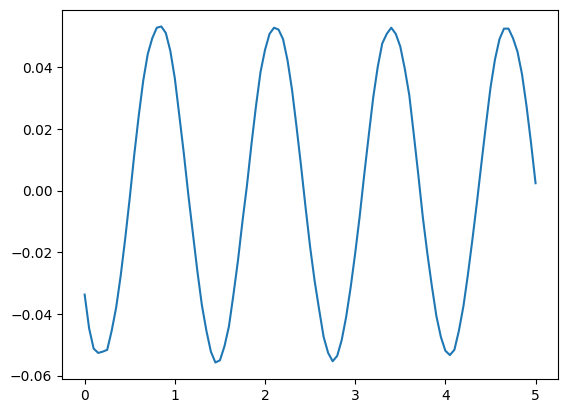

In [ ]:
# code to plot your position vs time data here
plt.plot(time,avgpos)

### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.



In [ ]:
# values of period and amplitude from the graph

A = 0.056  # amplitude in m
T = 1.3 # period in sec
phi=.8462

#### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [ ]:
# calculate omega

omega = 2*np.pi/T

#### Plot data and Analytic Solution

(5 points)

* copy your code for plotting the position versus time
* add code to overplot the analytic solution

* Determine the best value of $\phi$ using trial and error.


In [ ]:
# write a function to calculate the position of the SHO
# input = A, omega, phi, t
# return = position
def calculate( A,omega,phi,time):
  x= A*np.cos(omega*time-phi)
  return x
x=calculate( A,omega,phi,time)

Text(0, 0.5, 'Position(m)')

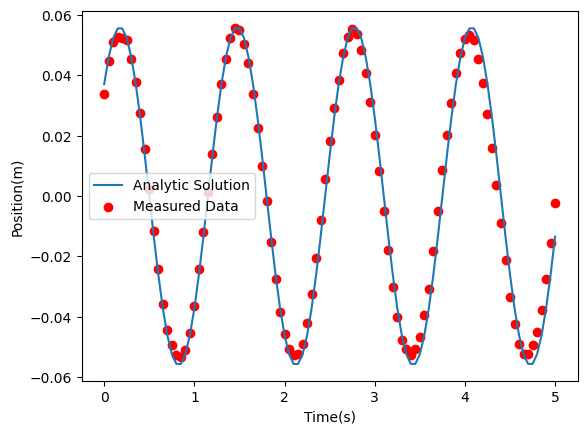

In [ ]:
# enter your code to plot your data and analytic solution
# be sure to use your function

plt.plot(time,x,label="Analytic Solution")
plt.scatter(time,-avgpos,label="Measured Data",color="r")
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")


#### Calculate the spring constant and intial conditions

(3 points)

From your fit, and anything else you need to measure, determine:
* the spring constant, $k$
* the initial position, $x_0$
* the initial velocity, $v_{x0}$


In [ ]:
m=.100 #kg
# calculate spring constant
k=omega**2*m
k

2.3360010416779544

In [ ]:
# calculate intial position here
xi=A*np.cos(-phi)
xi

0.037118661410948946

In [ ]:
# calculate the intial velocity here
vmax=A*omega
vi=(-vmax)*np.sin(omega*T+phi)
vi


-0.20266150727807056